In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

(1.999977420010387, 10) 1e-15
(-1.999977420010387, 12) 1e-15


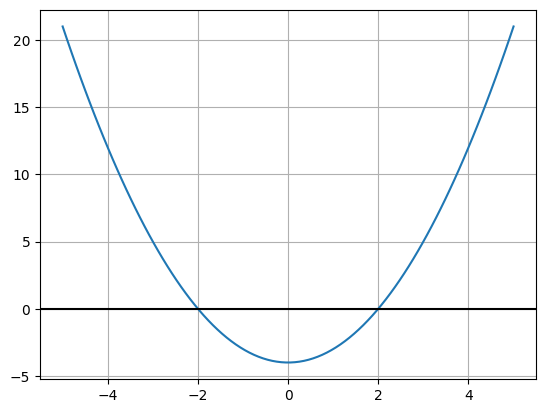

In [2]:
f=lambda x: x**2-4
def regula_falsi(f,a,b,tol=1e-4,m=100):
  if f(a)*f(b)>=0:
    return print("f(a) y f(b) deberian tener signos opuestos")
  for i in range(1,m+1):
    c=(a*f(b)-b*f(a))/(f(b)-f(a))
    if f(c)==0 or abs(f(c))<tol:
      return c, i
    elif f(c)*f(a)>0:
      a=c
    else:
      b=c
  return print("maximo de iteraciones alcanzado", c)
x=np.linspace(-5,5,100)
plt.plot(x,f(x))
plt.axhline(0,color="black")
plt.grid()
print(regula_falsi(f,1,4),1e-15)
print(regula_falsi(f,-4,1),1e-15)

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

Text(0, 0.5, 'F (x)')

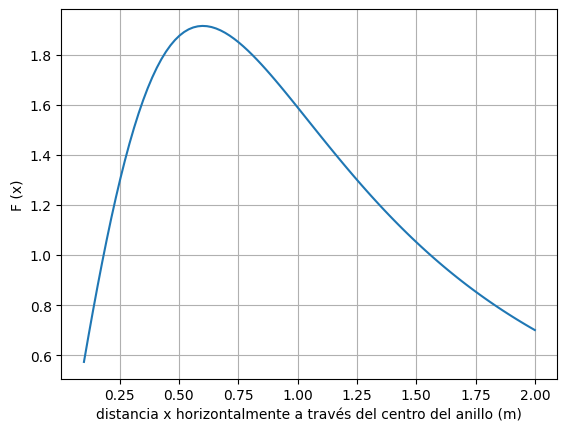

In [3]:
#Nota 1/(4*π*ϵ0)=k=8.98755 × 10^9 N⋅m²/C²
k=8.98755e9
q=2e-5
Q=q
#a
def f(a,x):
  F=k*((q*Q*x)/((x**2+a**2)**(3/2)))
  return F
#b
x=np.linspace(0.1,2,100)
plt.plot(x,f(0.85,x))
plt.grid()
plt.xlabel("distancia x horizontalmente a través del centro del anillo (m)")
plt.ylabel("F (x)")

0.23944930576835555


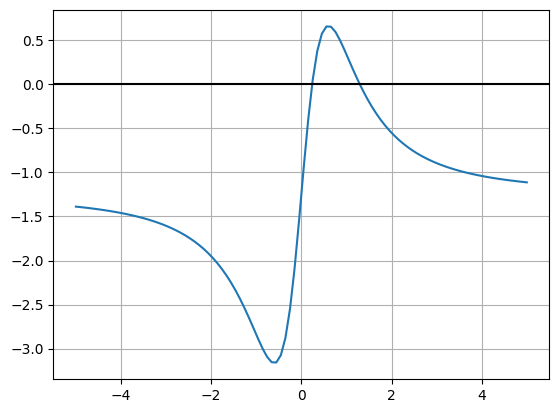

In [4]:
#C
a=0.85
def f1(x):
  F=(k*((q*Q*x)/((x**2+a**2)**(3/2))))-1.25
  return F
df=lambda x: (f1(x+1e-4)-f1(x-1e-4))/(2*1e-4)
def newton(f,df,x0,tol=1e-4,m=100):
  for i in range(1,m+1):
    if df(x0)==0:
      return print("la derivada es 0")
    x=x0-(f(x0)/df(x0))
    if abs(x-x0)<tol:
      return x
    else:
      x0=x
  return print("maximo de iteraciones",x)
x=np.linspace(-5,5,100)
plt.plot(x,f1(x))
plt.grid()
plt.axhline(0,color="black")
print(newton(f1,df,0.3))

Text(0, 0.5, 'f(a) con x=1')

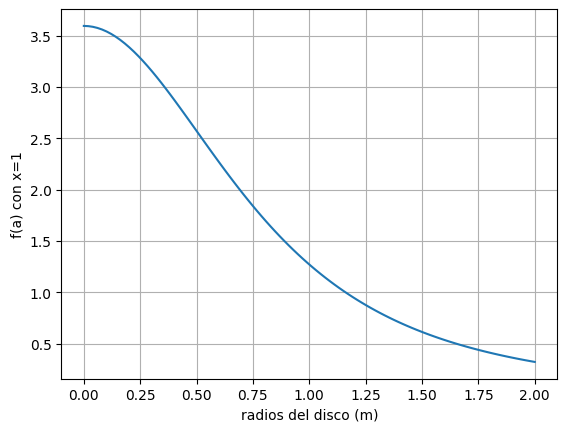

In [5]:
#d
# x=1
x=np.linspace(2,0,100)
plt.plot(x,f(x,1))
plt.grid()
plt.xlabel("radios del disco (m)")
plt.ylabel("f(a) con x=1")

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



<ipython-input-6-8b39e42ca04d>:6: RuntimeWarning: invalid value encountered in log
  v=lambda t: u*np.log(m0/(m0-q*t))-g*t


Text(0, 0.5, 'v(t) (m/s)')

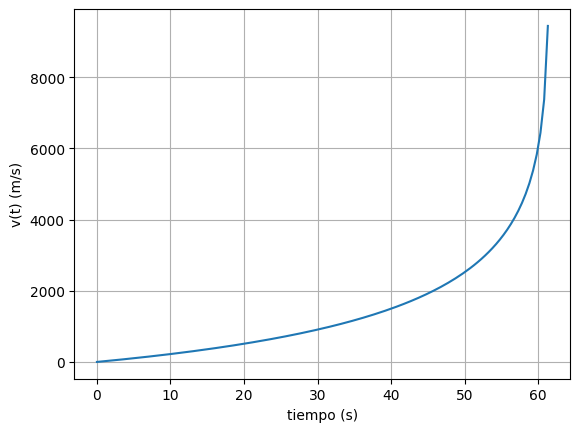

In [6]:
g=9.81
m0=1.6e5
u=1800
q=2600
#a
v=lambda t: u*np.log(m0/(m0-q*t))-g*t
#b
t=np.linspace(0,100,200)
plt.plot(t,v(t))
plt.grid()
plt.xlabel("tiempo (s)")
plt.ylabel("v(t) (m/s)")

newton: 26.40784795596704
biseccion (26.40784978866577, 20)
regula falsi (np.float64(26.40784769908472), 6)


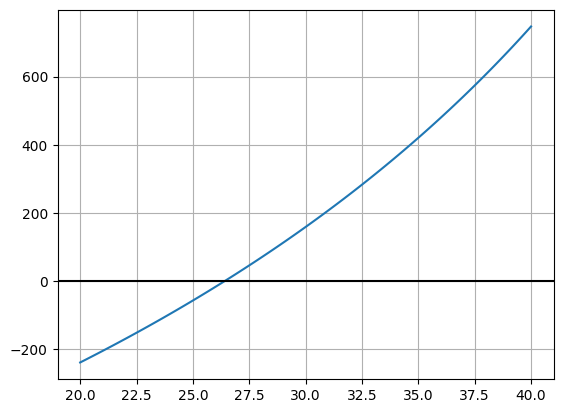

In [7]:
#c
v1=lambda t:u*np.log(m0/(m0-q*t))-g*t-750
dv=lambda t: (v1(t+1e-4)-v1(t-1e-4))/(2*1e-4)
t=np.linspace(20,40,100)
plt.plot(t,v1(t))
plt.grid()
plt.axhline(0,color="black")
def biseccion(f,a,b,tol=1e-4,m=100):
  if f(a)*f(b)>=0:
    return print("f(a) y f(b) deberian tener signos opuestos")
  for i in range(1,m+1):
    c=(a+b)/2
    if f(c)==0 or abs(f(c))<tol:
      return c, i
    elif f(c)*f(a)>0:
      a=c
    else:
      b=c
  return print("maximo de iteraciones alcanzado", c)
print("newton:",newton(v1,dv,22.5))
print("biseccion",biseccion(v1,22.5,30))
print("regula falsi",regula_falsi(v1,22.5,30))

Text(0, 0.5, 'tiempos (s) donde la velocidad es 750m/s')

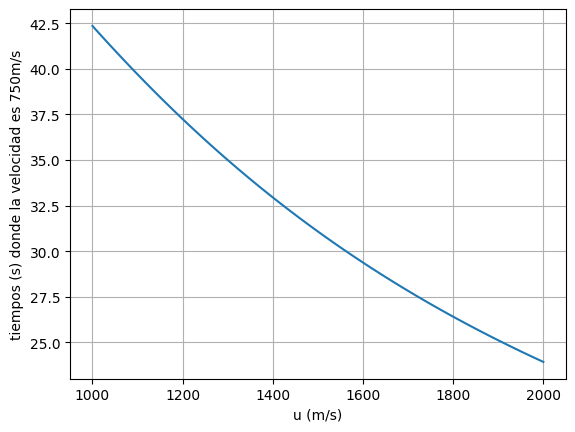

In [8]:
#d
u=np.linspace(1000,2000,100)
new=[]
ul=[]
for i in u:
  u=i
  new.append(newton(v1,dv,22.5,1e-4,1000))
  ul.append(i)
plt.plot(ul,new)
plt.grid()
plt.xlabel("u (m/s)")
plt.ylabel("tiempos (s) donde la velocidad es 750m/s")